In [1]:
# 1. data cleaning
# 2. EDA
# 3. text preprocessing
# 4. model building
# 5. evaluation
# 6 website building
# 7. improvement
# 8. deployment

In [2]:
import numpy as np
import pandas as pd 
df = pd.read_csv('spam.csv')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1, inplace=True)
df.sample(8)

,v1,v2
1372,ham,1) Go to write msg 2) Put on Dictionary mode 3...
2265,ham,I cant pick the phone right now. Pls send a me...
3123,ham,My uncles in Atlanta. Wish you guys a great se...
2163,ham,hi my darlin im on my way to London and we hav...
2126,ham,You do got a shitload of diamonds though
3329,ham,Send me yetty's number pls.
3474,ham,"Night has ended for another day, morning has c..."
4131,ham,Hi baby ive just got back from work and i was ...


## 1. Data Cleaning

In [3]:
!pip install nltk

In [4]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(8)

,target,text
1240,ham,Oh yes I can speak txt 2 u no! Hmm. Did u get ...
3482,ham,"Hello, my love! How goes that day ? I wish you..."
2593,ham,Tmr timin still da same wat cos i got lesson u...
63,ham,"Sorry my roommates took forever, it ok if I co..."
5213,ham,3 pa but not selected.
3622,ham,"Damn, poor zac doesn't stand a chance"
219,ham,Yeah you should. I think you can use your gt a...
4808,ham,"Don't worry though, I understand how important..."


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
df=df.drop_duplicates(keep='first')
df.shape

(5169, 2)

# 2. EDA

In [10]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [11]:
import matplotlib.pyplot as plt

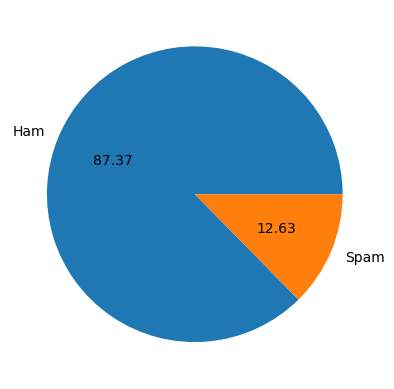

In [12]:
plt.pie(df['target'].value_counts(), labels = ['Ham', 'Spam'], autopct='%0.2f')
plt.show()

In [13]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaine\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [19]:
#ham
df[df['target']==0] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [20]:
#spam
df[df['target']==1] [['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [21]:
import seaborn as sns

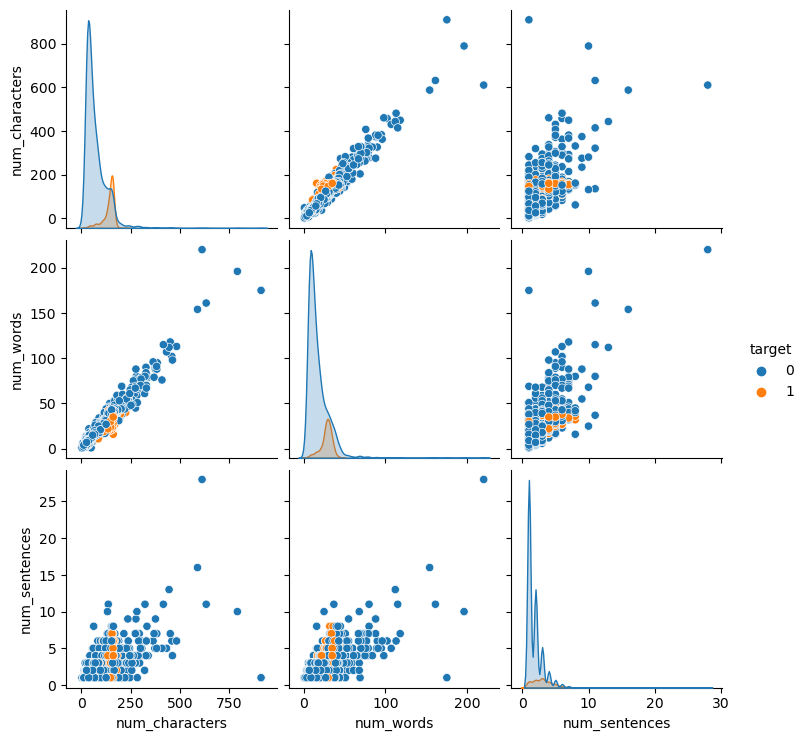

In [22]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

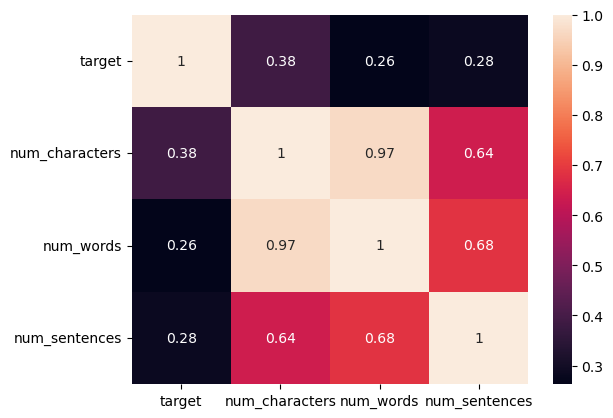

In [23]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

Firstly, 'num_characters' has more correlation(0.38) with 'target' compared to other attributes. Secondly, there is high multicollinearity between attributes like 'num_characters' & 'num_words' has 0.97 and 'num_characters' & 'num_sentences' has 0.64.
Hence, we are only going to use one attribute column for model building which will be 'num_characters'.

## 3. Text Preprocessing
* lower case
* tokenization
* removing special characters
* removing stop words and punctuation
* stemming

In [24]:
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [25]:
def transformed_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    x = []
    for i in text:
        if i.isalnum():
            x.append(i)
            
    text=x[:]
    x.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
            
    text = x[:]
    x.clear()
    
    for i in text:
        x.append(ps.stem(i))
                
    return " ".join(x)


df['transformed_text'] = df['text'].apply(transformed_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [26]:
transformed_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [27]:
!pip install wordcloud
from wordcloud import WordCloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


In [28]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [29]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

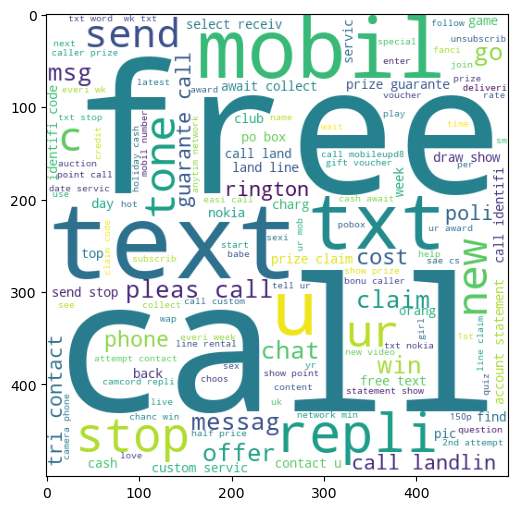

In [31]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [32]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

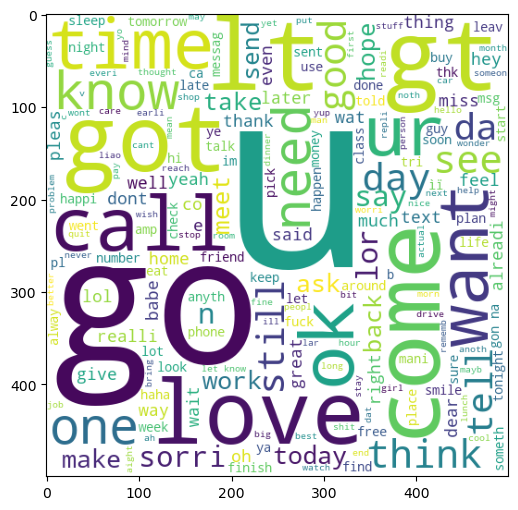

In [33]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [38]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [39]:
y = df['target'].values

In [40]:
x.shape

(5169, 3000)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [47]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [49]:
mgnb = gnb.fit(x_train, y_train)
ypred1 = mgnb.predict(x_test)
print(accuracy_score(y_test, ypred1))
print(precision_score(y_test, ypred1))
print(confusion_matrix(y_test, ypred1))

0.8607350096711799
0.5020746887966805
[[769 120]
 [ 24 121]]


In [51]:
mmnb = mnb.fit(x_train, y_train)
ypred2 = mmnb.predict(x_test)
print(accuracy_score(y_test, ypred2))
print(precision_score(y_test, ypred2))
print(confusion_matrix(y_test, ypred2))

0.9729206963249516
0.9915966386554622
[[888   1]
 [ 27 118]]


In [52]:
mbnb = bnb.fit(x_train, y_train)
ypred3 = mbnb.predict(x_test)
print(accuracy_score(y_test, ypred3))
print(precision_score(y_test, ypred3))
print(confusion_matrix(y_test, ypred3))

0.9729206963249516
0.9606299212598425
[[884   5]
 [ 23 122]]


In [53]:
# tfidf --> mnb

In [55]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mmnb, open('model.pkl', 'wb'))